# **CHALLENGE TELECOM X - ANÁLISIS DE EVASIÓN DE CLIENTES**

# **1. 📌 EXTRACCIÓN**

In [384]:
import requests
import pandas as pd
from pandas import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [385]:
# Cargar datos desde la URL
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
response = requests.get(url)
data = response.json()

df = pd.DataFrame(data)

# **2.🔧 TRANSFORMACIÓN**

## **2.1. Conociendo el conjunto de datos**

### Diccionario de datos:

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente

In [386]:
# Visualizar el conjunto de datos
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


**⚠️ Observación sobre la estructura del conjunto de datos:**

- El dataset actual contiene únicamente **6 columnas visibles**, mientras que el **diccionario de datos indica que deberían existir muchas más**.
- Se identificaron **4 columnas con estructuras anidadas**, por lo cual, es necesario aplicar un **proceso de normalización** que permita extraer y expandir esas columnas en variables separadas.


In [387]:
# Normalizar datos anidados
df = json_normalize(data)
df.sample(5)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
1265,1818-ESQMW,No,Female,0,No,No,27,Yes,No,Fiber optic,...,No,Yes,Yes,No,Yes,Month-to-month,Yes,Electronic check,89.20,2383.6
5823,7968-BCBQB,,Female,0,No,No,3,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),74.40,215.8
1348,1945-XISKS,No,Female,0,Yes,No,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.65,1335.2
4515,6185-TASNN,No,Male,1,No,No,1,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,No,Electronic check,46.30,46.3
2230,3108-PCCGG,No,Male,1,Yes,No,72,Yes,Yes,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Credit card (automatic),84.45,5899.85


In [388]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

## **2.2. Comprobación de incoherencias en los datos**

### **🔎 Verificar duplicados:**

In [389]:
# Verificar si existen filas duplicadas
duplicados = df.duplicated().sum()

if duplicados > 0:
    print(f"⚠️ Se encontraron {duplicados} filas duplicadas.")
else:
    print("✅ No se encontraron filas duplicadas.")

✅ No se encontraron filas duplicadas.


### **🔎 Verificar valores vacíos:**

In [390]:
# Contar valores vacíos por columna
valores_vacios = df.apply(lambda x: x.astype(str).str.strip() == '').sum()

# Filtrar columnas con al menos un valor vacío
valores_vacios = valores_vacios[valores_vacios > 0]

if not valores_vacios.empty:
    print("⚠️ Se encontraron columnas con valores vacíos o en blanco:")
    print(valores_vacios.sort_values(ascending=False))
else:
    print("✅ No se encontraron valores vacíos (cadenas vacías o solo espacios).")

⚠️ Se encontraron columnas con valores vacíos o en blanco:
Churn                    224
account.Charges.Total     11
dtype: int64


#### **→ Columna 'Churn':**

In [391]:
#Visualizar las columnas con los valores vacios de la columna 'Churn'
filas_vacias_churn = df[df['Churn'].astype(str).str.strip() == '']
filas_vacias_churn

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.3
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.1
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.2
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.2
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.9


🔎 Observaciones clave:

* Se identificaron 224 registros con valores faltantes en la columna Churn, lo que representa un 3.08% del total.

* La columna Churn está vacía, pero las demás variables están completas →
Esto indica que el "resto" del perfil del cliente es confiable y usable.

* El customer_tenure es mayor que 0 en todos los casos →
Indica que no parecen corresponder a clientes nuevos.

* Los clientes tienen cargos mensuales y totales distintos de cero
→ Significa que sí han utilizado el servicio.

* La columna Churn es la variable objetivo →
Es la etiqueta que define si el cliente abandonó o no. No tiene sentido estimarla sin tener datos reales de cancelación, o imputar un valor sin introducir sesgo.

✅ Manejo de valores vacíos:
* Eliminar las filas con Churn vacío →
Como representan solo el 3.08% del total, es seguro eliminarlas sin afectar significativamente la calidad de los datos y del análisis en consecuencia.

#### **→ Columna 'account.Charges.Total':**

In [392]:
#Visualizar las columnas con los valores vacios de la columna 'account.Charges.Total'
filas_vacias_charges_total = df[df['account.Charges.Total'].astype(str).str.strip() == '']
filas_vacias_charges_total

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


🔍 Observaciones clave:
  
* Se identificaron 11 valores vacíos en la columna account_Charges.Total.

* Todos los clientes tienen Churn = 'No'
→ Son clientes que no abandonaron la empresa.

* Todos tienen customer_tenure = 0
→ Esto indica que son clientes clientes con una permanecia de 0 meses, por lo tanto son clientes nuevos que acaban de unirse y no han generado aún cargos acumulados.

* El total cobrado aún no ha sido registrado, pero ya tienen un cargo mensual asignado.

* La ausencia de facturación acumulada es coherente, ya que aún no han generado cargos, por lo tanto, estos valores no representan errores, sino una condición esperada del negocio: clientes nuevos sin historial de consumo.

✅ Manejo de valores vacíos:

* Eliminar estos 11 registros del análisis → Ya que no tienen historial suficiente para evaluar su probabilidad de churn. El analisis se debe realizar con clientes que tengan como minimo 1 mes de consumo.

### **🔎 Verificar valores nulos:**

In [393]:
# Contar valores nulos (NaN) por columna
valores_nulos = df.isnull().sum()

# Filtrar solo columnas con al menos un valor nulo
valores_nulos = valores_nulos[valores_nulos > 0]

if not valores_nulos.empty:
    print("⚠️ Columnas con valores nulos (NaN):")
    print(valores_nulos.sort_values(ascending=False))
else:
    print("✅ No se encontraron valores nulos (NaN).")

✅ No se encontraron valores nulos (NaN).


### **🔎 Verificar los tipos de datos:**

In [394]:
# Explorar los valores únicos y tipos de datos
for column in df.columns:
    num_unique = df[column].nunique(dropna=False)

    print(f"➡️ COLUMNA: '{column}'")
    print(f"    • Tipo de dato           : {df[column].dtype}")
    print(f"    • Valores únicos totales : {num_unique}")

    if num_unique <= 10:
        print(f'    • Valores únicos         : {df[column].unique()}')
    else:
        muestra = df[column].dropna().unique()[:5]  # Tomar hasta 5 valores únicos no nulos
        print(f'    • Muestra de valores únicos (5 de {num_unique}): {muestra}')

    print('-' * 100)

➡️ COLUMNA: 'customerID'
    • Tipo de dato           : object
    • Valores únicos totales : 7267
    • Muestra de valores únicos (5 de 7267): ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' '0011-IGKFF' '0013-EXCHZ']
----------------------------------------------------------------------------------------------------
➡️ COLUMNA: 'Churn'
    • Tipo de dato           : object
    • Valores únicos totales : 3
    • Valores únicos         : ['No' 'Yes' '']
----------------------------------------------------------------------------------------------------
➡️ COLUMNA: 'customer.gender'
    • Tipo de dato           : object
    • Valores únicos totales : 2
    • Valores únicos         : ['Female' 'Male']
----------------------------------------------------------------------------------------------------
➡️ COLUMNA: 'customer.SeniorCitizen'
    • Tipo de dato           : int64
    • Valores únicos totales : 2
    • Valores únicos         : [0 1]
------------------------------------------------------

### **🔎 Verificar la consistencia y validez de datos categóricos:**

- Coherencia de los valores 'No phone service' y 'No internet service':

In [395]:
# Verificar si los usuarios con 'phone.PhoneService' == 'No' coinciden exactamente
# con aquellos que tienen 'No phone service' en todas las columnas relacionadas

# Máscara 1: usuarios sin servicio telefónico principal
mascara_servicio_telefonico = df['phone.PhoneService'] == 'No'

# Máscara 2: usuarios con 'No phone service' en todas las columnas individuales relacionadas
columnas_telefonia = ['phone.MultipleLines']
mascara_columnas_telefonia = (df[columnas_telefonia] == 'No phone service').all(axis=1)

# Comparar si ambas máscaras son idénticas
coinciden_telefonia = mascara_servicio_telefonico.equals(mascara_columnas_telefonia)

# Mostrar resultado
print(f"📞 ¿Coinciden exactamente los usuarios sin servicio telefónico principal con los que tienen 'No phone service' en columnas individuales?: {coinciden_telefonia}")

📞 ¿Coinciden exactamente los usuarios sin servicio telefónico principal con los que tienen 'No phone service' en columnas individuales?: True


In [396]:
# Comprobar si las filas con 'internet.InternetService' == 'No' coinciden exactamente
# con aquellos que tienen 'No internet service' en todas las columnas relacionadas

# Máscara 1: usuarios con InternetService == 'No'
servicio_internet_principal = (df['internet.InternetService'] == 'No')

# Máscara 2: usuarios con 'No internet service' en todas las columnas individuales
columnas_internet = [
    'internet.OnlineSecurity',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies'
]
mascara_columnas_internet = (df[columnas_internet] == 'No internet service').all(axis=1)

# Comparar si ambas máscaras son iguales
coinciden_internet = servicio_internet_principal.equals(mascara_columnas_internet)
print(f"🌐 ¿Coinciden exactamente los usuarios sin servicio de internet principal con los que tienen 'No internet service' en columnas individuales?: {coinciden_internet}")


🌐 ¿Coinciden exactamente los usuarios sin servicio de internet principal con los que tienen 'No internet service' en columnas individuales?: True


* Los clientes nuevos ('customer.tenure' == 0) no deben tener cargos mensuales o totales mayores a 0:

In [397]:
df[df['customer.tenure'] == 0][['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']]

,customer.tenure,account.Charges.Monthly,account.Charges.Total
975,0,56.05,
1775,0,20.00,
1955,0,61.90,
2075,0,19.70,
2232,0,20.25,
2308,0,25.35,
2930,0,73.35,
3134,0,25.75,
3203,0,52.55,
4169,0,80.85,


### ⚠️ **Inconsistencias encontradas:**

🔹 **Valores vacíos**
- La columna `'Churn'` presenta **224 valores vacíos**. → Eliminar filas.
- La columna `'account.Charges.Total'` presenta **11 valores vacíos**. → Eliminar filas.

🔹 **Tipo de datos incorrecto**
- La columna `'account.Charges.Total'` contiene datos numéricos (float), pero su tipo declarado es **`object`**. → Cambiar a 'float'.

🔹 **Inconsistencia y validez de datos categóricos**
- La columna `'phone.MultipleLines'` no es útil si `'phone.PhoneService' == 'No'`. De la misma manera las columnas `'internet.OnlineSecurity'`, `'internet.OnlineBackup'`, `'internet.DeviceProtection'`, `'internet.TechSupport'`, `'internet.StreamingTV'`, `'internet.StreamingMovies'`  no aplican si `'internet.InternetService' == 'No'`. Conservar esta estructura sin imputar valores, ya que asignar "No" artificialmente distorsionaría el análisis. → Estas columnas se analizarán únicamente para el subconjunto de clientes con servicio activo.

- Existen 11 registros donde `'customer.tenure'` == 0 (es decir, el cliente no ha estado ni un mes con el servicio), pero el campo `'account.Charges.Monthly'` muestra montos mayores a 0, mientras que `'account.Charges.Total'` aparece vacío. Esto sugiere una posible imputación pendiente o error en la captura de datos. → Se eliminan junto con los valores vacíos de `'account.Charges.Total'`.

## **2.3. Manejo de inconsistencias**

### **Cambiar la columna 'account.Charges.Total' a 'float':**

In [398]:
# Convertir 'account.Charges.Total' a numérico (float), forzando errores como NaN
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
print(df['account.Charges.Total'].dtype)

float64


### **Eliminar filas con valores vacios en la columna 'Churn'**

In [399]:
# Eliminar filas con valores vacíos o espacios en blanco en la columna 'Churn'
df = df[df['Churn'].astype(str).str.strip() != ''].copy().reset_index(drop=True)
print("Número de filas después de eliminar las vacías en 'Churn':", len(df))

Número de filas después de eliminar las vacías en 'Churn': 7043


### **Eliminar filas con valores vacios en la columna 'account_Charges.Total'**



In [400]:
# Eliminar filas donde tenure == 0 y 'account.Charges.Total' es NaN
df = df[~((df['customer.tenure'] == 0) & (df['account.Charges.Total'].isna()))].reset_index(drop=True)
print("Número de filas después de eliminar las vacías en 'account_Charges.Total:", len(df))

Número de filas después de eliminar las vacías en 'account_Charges.Total: 7032


## **2.4. Columna de cuentas diarias**

In [401]:
# Crear la columna 'Cuentas_Diarias', asumiendo que el mes tiene 30 días (promedio estándar):
df.loc[:, 'Cuentas_Diarias'] = (df['account.Charges.Monthly'] / 30).round(2)
print(df[['account.Charges.Monthly', 'Cuentas_Diarias']])

      account.Charges.Monthly  Cuentas_Diarias
0                       65.60             2.19
1                       59.90             2.00
2                       73.90             2.46
3                       98.00             3.27
4                       83.90             2.80
...                       ...              ...
7027                    55.15             1.84
7028                    85.10             2.84
7029                    50.30             1.68
7030                    67.85             2.26
7031                    59.00             1.97

[7032 rows x 2 columns]


## **2.5 Estandarización y transformación de datos**

- Convertir valores textuales como "Sí" y "No" de la columna 'churn' en valores binarios (1 y 0):

In [402]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
print(df['Churn'].value_counts())

Churn
0    5163
1    1869
Name: count, dtype: int64


- Renombrar columnas:

In [403]:
df.rename(columns={
  'customerID': 'id_cliente',
  'Churn': 'abandono_servicio',
  'customer.gender': 'genero',
  'customer.SeniorCitizen': 'adulto_mayor',
  'customer.Partner': 'pareja',
  'customer.Dependents': 'dependientes',
  'customer.tenure': 'meses_contrato',
  'phone.PhoneService': 'servicio_telefonico',
  'phone.MultipleLines': 'varias_lineas',
  'internet.InternetService': 'servicio_internet',
  'internet.OnlineSecurity': 'seguridad_en_linea',
  'internet.OnlineBackup': 'respaldo_en_linea',
  'internet.DeviceProtection': 'proteccion_dispositivo',
  'internet.TechSupport': 'soporte_tecnico',
  'internet.StreamingTV': 'tv_cable',
  'internet.StreamingMovies': 'streaming_peliculas',
  'account.Contract': 'tipo_contrato',
  'account.PaperlessBilling': 'factura_electronica',
  'account.PaymentMethod': 'metodo_pago',
  'account.Charges.Monthly': 'gasto_mensual',
  'account.Charges.Total': 'gasto_total',
  'Cuentas_Diarias': 'cuenta_diaria'
}, inplace=True)

In [404]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_cliente              7032 non-null   object 
 1   abandono_servicio       7032 non-null   int64  
 2   genero                  7032 non-null   object 
 3   adulto_mayor            7032 non-null   int64  
 4   pareja                  7032 non-null   object 
 5   dependientes            7032 non-null   object 
 6   meses_contrato          7032 non-null   int64  
 7   servicio_telefonico     7032 non-null   object 
 8   varias_lineas           7032 non-null   object 
 9   servicio_internet       7032 non-null   object 
 10  seguridad_en_linea      7032 non-null   object 
 11  respaldo_en_linea       7032 non-null   object 
 12  proteccion_dispositivo  7032 non-null   object 
 13  soporte_tecnico         7032 non-null   object 
 14  tv_cable                7032 non-null   

# **3. 📊 CARGA Y ANÁLISIS**

## **3.1. Análisis descriptivo**

- Análisis descriptivo de las variables numéricas:

In [405]:
df[['meses_contrato', 'gasto_mensual', 'gasto_total', 'cuenta_diaria']].describe()


,meses_contrato,gasto_mensual,gasto_total,cuenta_diaria
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,2.159891
std,24.545260,30.085974,2266.771362,1.002955
min,1.000000,18.250000,18.800000,0.610000
25%,9.000000,35.587500,401.450000,1.187500
50%,29.000000,70.350000,1397.475000,2.340000
75%,55.000000,89.862500,3794.737500,2.992500
max,72.000000,118.750000,8684.800000,3.960000


## **3.2. Distribución de evasión**

In [406]:
# Contar valores absolutos
conteo = df['abandono_servicio'].value_counts().sort_index()

# Calcular porcentajes
porcentaje = df['abandono_servicio'].value_counts(normalize=True).sort_index() * 100

# Crear DataFrame resumen
resumen = pd.DataFrame({
    'Estado': ['Permanece (0)', 'Abandona (1)'],
    'Cantidad': conteo.values,
    'Porcentaje (%)': porcentaje.values.round(2)
})

# Agregar fila de total
resumen.loc[len(resumen.index)] = ['Total', conteo.sum(), 100.0]

# Mostrar
print(resumen)


          Estado  Cantidad  Porcentaje (%)
0  Permanece (0)      5163           73.42
1   Abandona (1)      1869           26.58
2          Total      7032          100.00


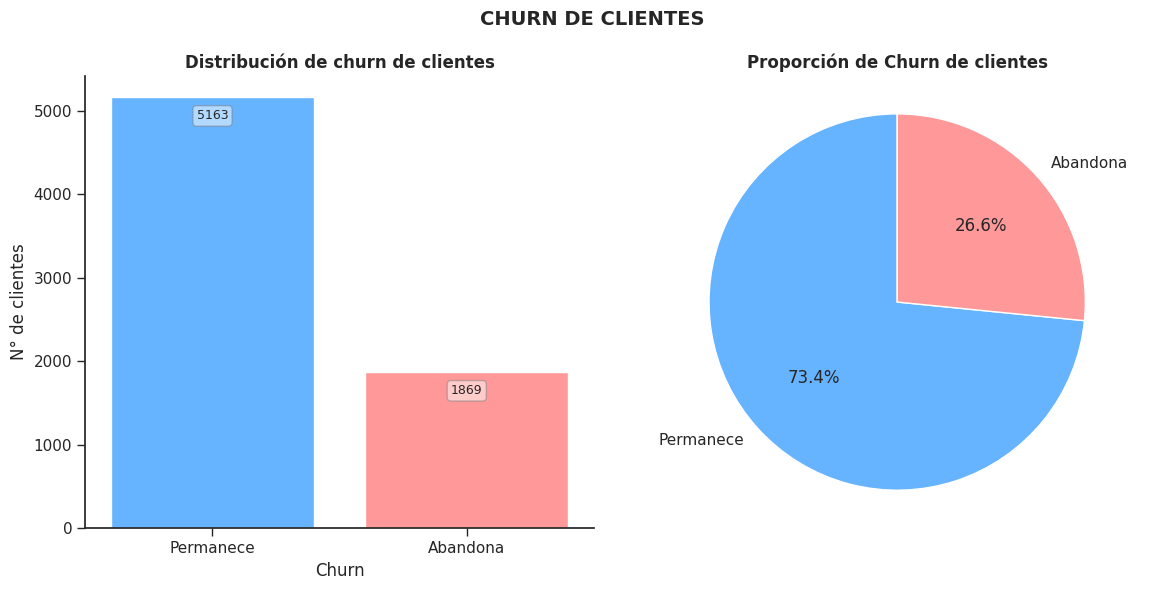

In [407]:
# Estilo
sns.set(style="white")

# Tamaño de la figura
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Colores
colores = ['#66b3ff', '#ff9999']

# Conteos de churn
churn_counts = df['abandono_servicio'].value_counts()
churn_labels = churn_counts.index.map({0: 'Permanece', 1: 'Abandona'})
churn_values = churn_counts.values

# Gráfico de barras
bars = sns.barplot(x=churn_labels, y=churn_values, ax=ax[0])

# Desactivar grilla de fondo y mostrar solo los ejes izquierdo e inferior
ax[0].grid(False)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(True)
ax[0].spines['bottom'].set_visible(True)

# Mostrar ticks en ejes
ax[0].tick_params(axis='y',which='both',direction='out',length=6,width=1,bottom=True,top=False,left=True,right=False)
ax[0].tick_params(axis='x',which='both',direction='out',length=6,width=1,bottom=True,top=False,left=False,right=False)

# Aplicar colores a las barras
bars.patches[0].set_facecolor(colores[0])
bars.patches[1].set_facecolor(colores[1])

# Etiquetas y estilo
ax[0].set_title('Distribución de churn de clientes', fontweight='bold')
ax[0].set_ylabel('N° de clientes')
ax[0].set_xlabel('Churn')

# Etiquetas con fondo blanco semitransparente
for i, val in enumerate(churn_values):
    ax[0].text(i, val - 300, f'{val}', ha='center', va='bottom',fontsize=9,
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='gray', alpha=0.5)
    )

# Gráfico de pastel
ax[1].pie(churn_values,labels=churn_labels,autopct='%1.1f%%',startangle=90,colors=colores)
ax[1].axis('equal')
ax[1].set_title('Proporción de Churn de clientes', fontweight='bold')

# Título general
plt.suptitle('CHURN DE CLIENTES', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## **3.3. Recuento de evasión por variables categóricas**

In [408]:
# Resumen del recuento de evasión por variables categóricas

def resumen_churn_por_variable(df, variable, nombre_variable=''):
    # Agrupar y contar los valores por categoría y abandono
    resumen = df.groupby([variable, 'abandono_servicio']).size().unstack(fill_value=0)

    # Renombrar columnas para mayor claridad
    resumen.columns = ['Permanece', 'Abandona']
    resumen.index.name = nombre_variable if nombre_variable else variable

    # Añadir columna con el total
    resumen['Total'] = resumen.sum(axis=1)

    return resumen

In [409]:
# Generar gráfico de evasión por variables categóricas

def churn_analisis_variable(df, variable, titulo_variable):
    # Filtrar los datos
    churn_si = df[df['abandono_servicio'] == 1]

    # Crear figura
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Gráfico de conteo con etiquetas
    sns.countplot(data=df, x=variable, hue='abandono_servicio', palette='Set2', ax=axes[0])
    axes[0].set_title(f'Abandono del Servicio por {titulo_variable}', fontweight='bold')
    axes[0].set_xlabel(titulo_variable)
    axes[0].set_ylabel('N° de clientes')
    axes[0].legend(title='Churn', labels=['Permanece', 'Abandona'])
    axes[0].tick_params(axis='x', rotation=25)
    axes[0].grid(True, axis='y', linestyle='--', alpha=0.5)

    for container in axes[0].containers:
        axes[0].bar_label(container, fmt='%d', label_type='edge',
                          padding=2, fontsize=9, bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.7))

    # Gráfico de proporciones (solo churn = 1)
    proporciones = churn_si[variable].value_counts(normalize=True) * 100

    axes[1].pie(proporciones.values,
                labels=[f'{cat}\n{val:.1f}%' for cat, val in proporciones.items()],
                autopct='',
                colors=sns.color_palette('Reds', len(proporciones)),
                startangle=90,
                wedgeprops=dict(edgecolor='white'))

    axes[1].set_title(f'Proporción entre los que SÍ Abandonaron ({titulo_variable})', fontweight='bold')

    # Título general con subrayado
    plt.suptitle(f'CHURN DE CLIENTES SEGÚN {titulo_variable.upper()}', fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.show()

### **📊 Churn según Género:**


        Permanece  Abandona  Total
Género                            
Female       2544       939   3483
Male         2619       930   3549


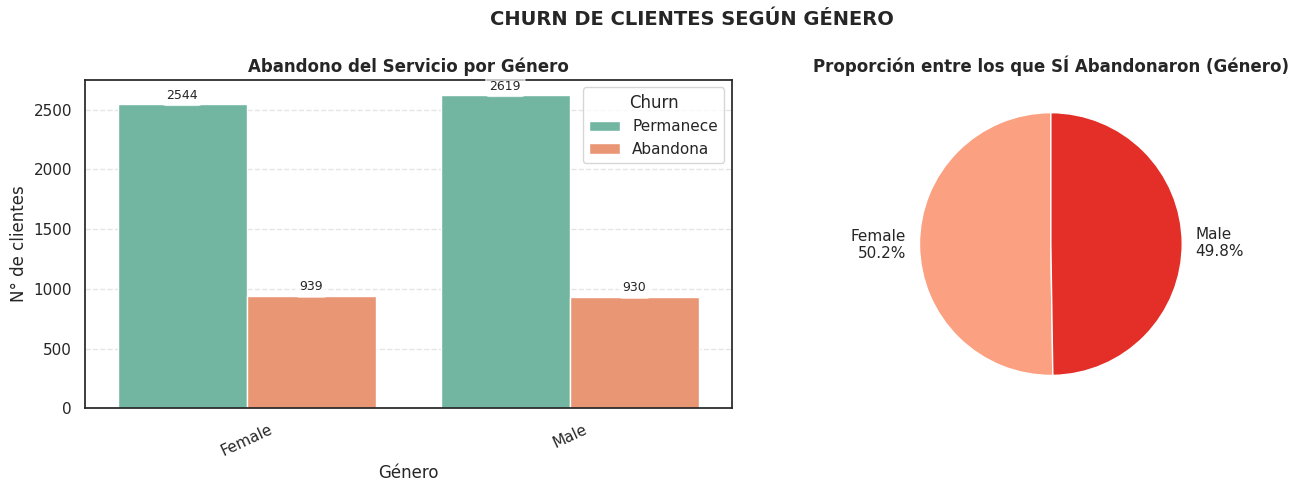

In [410]:
print(resumen_churn_por_variable(df, 'genero', 'Género'))
churn_analisis_variable(df, 'genero', 'Género')

### **📊 Churn según Tipo de contrato:**

                  Permanece  Abandona  Total
Tipo de Contrato                            
Month-to-month         2220      1655   3875
One year               1306       166   1472
Two year               1637        48   1685


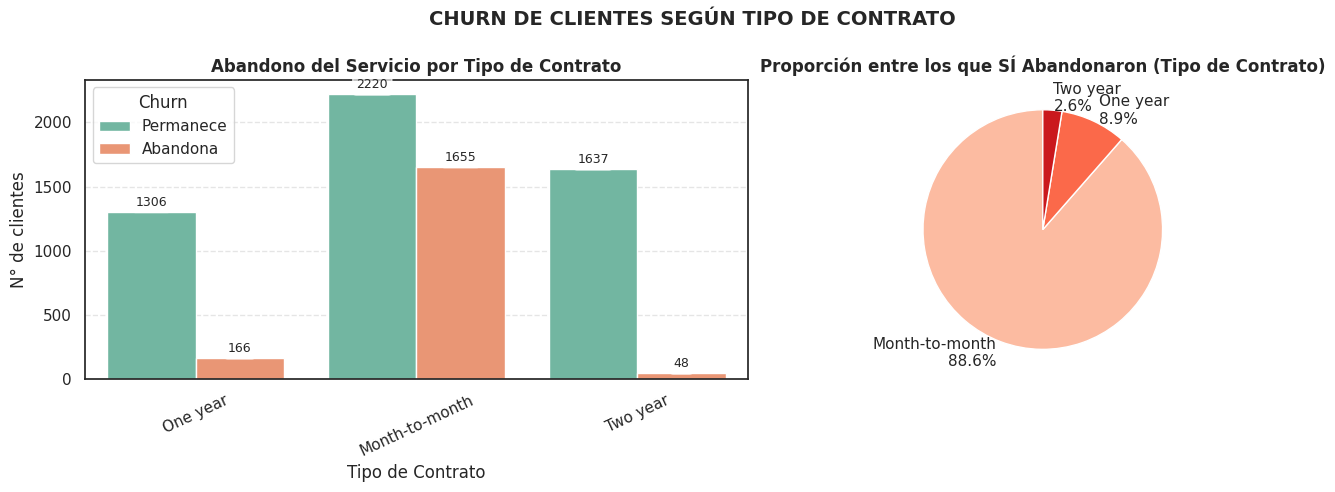

In [411]:
print(resumen_churn_por_variable(df, 'tipo_contrato', 'Tipo de Contrato'))
churn_analisis_variable(df, 'tipo_contrato', 'Tipo de Contrato')

### **📊 Churn según Método de pago:**

                           Permanece  Abandona  Total
Método de Pago                                       
Bank transfer (automatic)       1284       258   1542
Credit card (automatic)         1289       232   1521
Electronic check                1294      1071   2365
Mailed check                    1296       308   1604


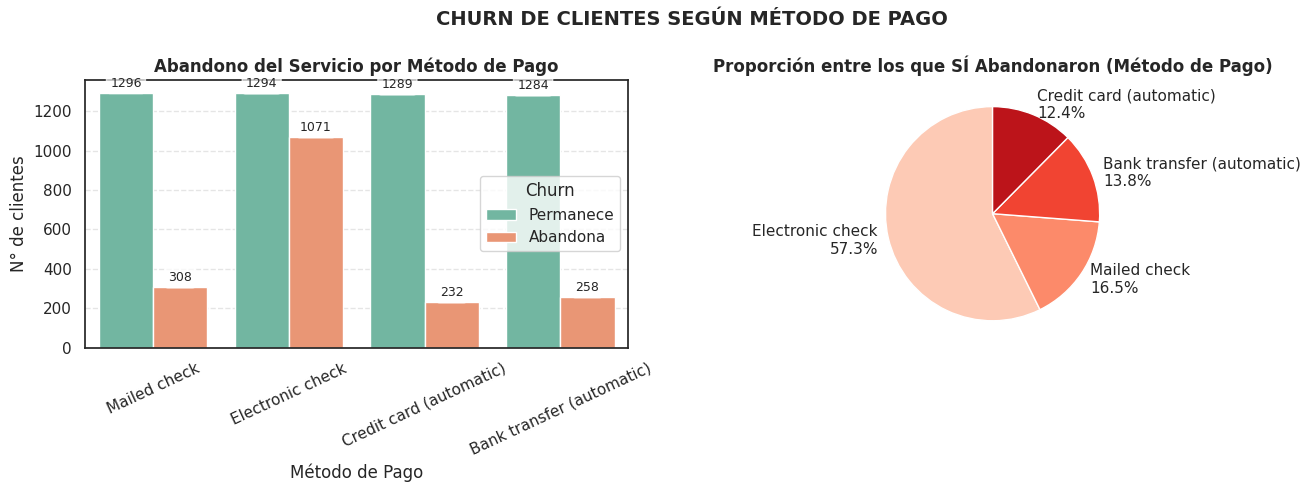

In [412]:
print(resumen_churn_por_variable(df, 'metodo_pago', 'Método de Pago'))
churn_analisis_variable(df, 'metodo_pago', 'Método de Pago')

### **📊 Churn según Servicio telefónico:**

                     Permanece  Abandona  Total
Servicio Telefónico                            
No                         510       170    680
Yes                       4653      1699   6352


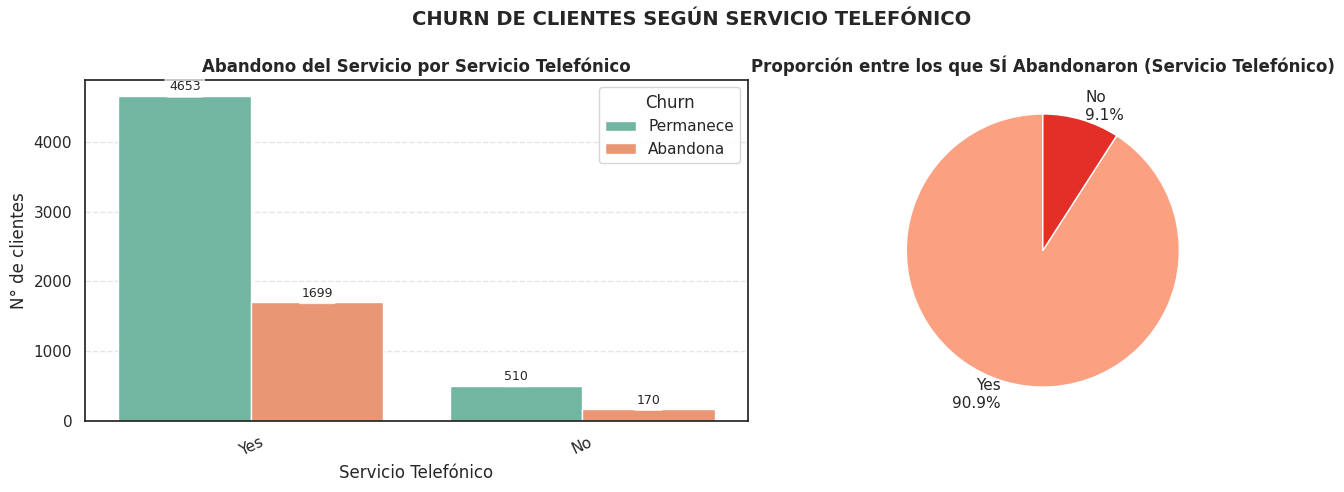

In [413]:
print(resumen_churn_por_variable(df, 'servicio_telefonico', 'Servicio Telefónico'))
churn_analisis_variable(df, 'servicio_telefonico', 'Servicio Telefónico')

### **📊 Churn según Servicio de internet:**

                      Permanece  Abandona  Total
Servicio de Internet                            
DSL                        1957       459   2416
Fiber optic                1799      1297   3096
No                         1407       113   1520


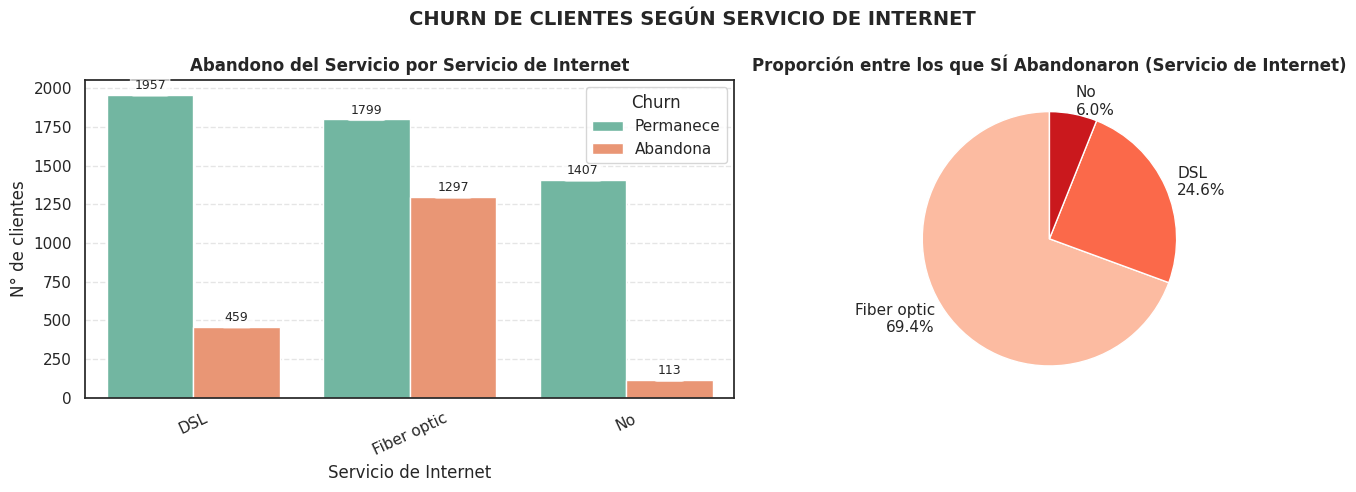

In [414]:
print(resumen_churn_por_variable(df, 'servicio_internet', 'Servicio de Internet'))
churn_analisis_variable(df, 'servicio_internet', 'Servicio de Internet')

## **3.4. Conteo de evasión por variables numéricas**

### **📈 Churn según Meses de Contrato:**

In [415]:
# Calcular total de clientes por cada valor de meses_contrato
total_por_mes = df.groupby('meses_contrato').size()

# Calcular cantidad de abandonos por cada valor de meses_contrato
abandonos_por_mes = df[df['abandono_servicio'] == 1].groupby('meses_contrato').size()

# Calcular tasa de abandono (%)
tasa_abandono = (abandonos_por_mes / total_por_mes) * 100

# Crear DataFrame para graficar
tasa_df = tasa_abandono.reset_index()
tasa_df.columns = ['meses_contrato', 'tasa_abandono']

# Gráfico de línea con Plotly
fig = px.line(
    tasa_df,
    x='meses_contrato',
    y='tasa_abandono',
    markers=True,
    title='<b>TASA DE ABANDONO (%) SEGÚN MESES DE CONTRATO</b>',
    labels={'meses_contrato': 'Meses de Contrato', 'tasa_abandono': 'Tasa de Abandono (%)'},
)

# Personalización del gráfico
fig.update_traces(line=dict(color='crimson', width=2))
fig.update_layout(
    title_font_size=16,
    plot_bgcolor='white',
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
)

fig.show()


### **📊 Churn según Gasto mensual y Gasto total:**

In [416]:
# Variables numéricas que analizaremos
variables_numericas = ['gasto_mensual', 'gasto_total']
titulos = {
    'gasto_mensual': 'Gasto Mensual',
    'gasto_total': 'Gasto Total',
}

# Crear resumen descriptivo por grupo de abandono
descripcion = df.groupby('abandono_servicio')[variables_numericas].describe().transpose()

# Renombrar niveles para claridad
descripcion.rename(columns={0: 'Permanece (0)', 1: 'Abandona (1)'}, inplace=True)

# Mostrar resumen
print("📊 Descripción estadística por grupo de abandono:\n")
print(descripcion.round(2))

📊 Descripción estadística por grupo de abandono:

abandono_servicio    Permanece (0)  Abandona (1)
gasto_mensual count        5163.00       1869.00
              mean           61.31         74.44
              std            31.09         24.67
              min            18.25         18.85
              25%            25.10         56.15
              50%            64.45         79.65
              75%            88.48         94.20
              max           118.75        118.35
gasto_total   count        5163.00       1869.00
              mean         2555.34       1531.80
              std          2329.46       1890.82
              min            18.80         18.85
              25%           577.83        134.50
              50%          1683.60        703.55
              75%          4264.12       2331.30
              max          8672.45       8684.80


In [417]:
# Etiquetas personalizadas para abandono
df_plot = df.copy()
df_plot['estado_abandono'] = df_plot['abandono_servicio'].map({0: 'No (0)', 1: 'Sí (1)'})

# Gasto Mensual
fig1 = px.box(
    df_plot,
    x='estado_abandono',
    y='gasto_mensual',
    color='estado_abandono',
    title='<b>CHURN SEGÚN GASTO MENSUAL</b>',
    labels={'estado_abandono': 'Abandono del Servicio', 'gasto_mensual': 'Gasto Mensual (USD)'},
    color_discrete_map={'No (0)': '#66C2A5', 'Sí (1)': '#FC8D62'}
)
fig1.update_layout(showlegend=False)
fig1.show()

In [418]:
# Gasto Total
fig2 = px.box(
    df_plot,
    x='estado_abandono',
    y='gasto_total',
    color='estado_abandono',
    title='<b>CHURN SEGÚN GASTO TOTAL</b>',
    labels={'estado_abandono': 'Abandono del Servicio', 'gasto_total': 'Gasto Total (USD)'},
    color_discrete_map={'No (0)': '#66C2A5', 'Sí (1)': '#FC8D62'}
)
fig2.update_layout(showlegend=False)
fig2.show()

## **3.5. Análisis de correlación entre variables**

### **Relación entre Cuenta Diaria y Abandono del Servicio:**

In [419]:
# Calcular la correlación entre cuenta_diaria y abandono_servicio
correlacion = df[['cuenta_diaria', 'abandono_servicio']].corr().iloc[0, 1]
print(f"📈 Correlación entre cuenta_diaria y abandono_servicio: {correlacion:.2f}")

# Crear gráfico de dispersión
fig = px.scatter(
    df,
    x='cuenta_diaria',
    y='abandono_servicio',
    trendline='ols',  # Ajusta una línea de regresión
    opacity=0.4,
    title=f'<b>Relación entre Cuenta Diaria y Abandono del Servicio</b><br><span style="font-size:12px;">Correlación: {correlacion:.2f}</span>',
    labels={
        'cuenta_diaria': 'Cuenta Diaria ($)',
        'abandono_servicio': 'Abandono del Servicio (0 = No, 1 = Sí)'
    },
    color='abandono_servicio',
    color_discrete_map={0: 'steelblue', 1: 'crimson'}
)

# Estilo del gráfico
fig.update_layout(
    plot_bgcolor='#F9F9F9',
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    title_font_size=16
)

fig.show()


📈 Correlación entre cuenta_diaria y abandono_servicio: 0.19


### **Correlación entre tener servicio de telefonía y churn:**

In [420]:
# Crear nueva variable binaria para servicio de telefonía
df['tiene_telefonia'] = df['servicio_telefonico'].apply(lambda x: 1 if x == 'Yes' else 0)

# Calculando correlación entre tener telefonia y abandono
correlacion_tel = df[['tiene_telefonia', 'abandono_servicio']].corr().iloc[0, 1]
print(f"📈 Correlación entre tener telefonía y abandono: {correlacion_tel:.2f}")

📈 Correlación entre tener telefonía y abandono: 0.01


### **Correlación entre tener servicio de internet y churn:**

In [421]:
# Crear nueva variable binaria para servicio de internet
df['tiene_internet'] = df['servicio_internet'].apply(lambda x: 1 if x in ['DSL', 'Fiber optic'] else 0)

# Calculando correlación entre tener internet y abandono
correlacion_int = df[['tiene_internet', 'abandono_servicio']].corr().iloc[0, 1]
print(f"📈 Correlación entre tener internet y abandono: {correlacion_int:.2f}")

📈 Correlación entre tener internet y abandono: 0.23


### **Relación entre Servicios adicionales de internet y Abandono del Servicio:**

📊 Correlación entre abandono y servicios contratados (solo clientes con internet):

tv_cable                 -0.04
streaming_peliculas      -0.04
proteccion_dispositivo   -0.18
respaldo_en_linea        -0.20
soporte_tecnico          -0.27
seguridad_en_linea       -0.28
Name: abandono_servicio, dtype: float64


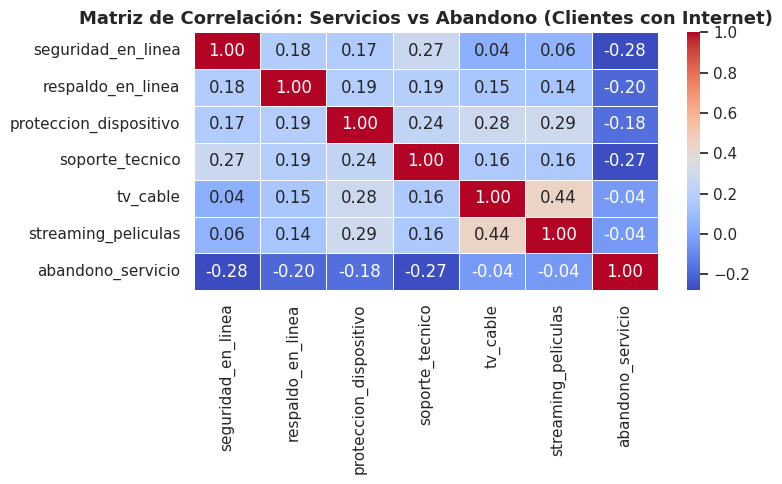

In [422]:
# 1. Filtrar solo clientes que tienen servicio de internet
clientes_internet = df[df['servicio_internet'] != 'No'].copy()

# 2. Variables de servicios relacionados a internet
servicios_internet = [
    'seguridad_en_linea',
    'respaldo_en_linea',
    'proteccion_dispositivo',
    'soporte_tecnico',
    'tv_cable',
    'streaming_peliculas'
]

# 3. Convertir las columnas de servicios a valores binarios (Yes=1, No=0)
for col in servicios_internet:
    clientes_internet[col] = clientes_internet[col].map({'Yes': 1, 'No': 0})

# 4. Correlación con la variable objetivo (abandono)
clientes_internet['abandono_servicio'] = clientes_internet['abandono_servicio'].astype(int)
corr_servicios = clientes_internet[servicios_internet + ['abandono_servicio']].corr()

# 5. Mostrar matriz de correlación
print("📊 Correlación entre abandono y servicios contratados (solo clientes con internet):\n")
print(corr_servicios['abandono_servicio'].drop('abandono_servicio').sort_values(ascending=False).round(2))

# 6. Visualización con heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr_servicios, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación: Servicios vs Abandono (Clientes con Internet)', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()


# **4. 📄INFORME DE ANÁLISIS DE EVASIÓN DE CLIENTES (CHURN)**

## **1. Introducción**

El presente informe tiene como objetivo analizar los factores que influyen en la **evasión de clientes** (*churn*) dentro de **Telecom X**. La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes. El churn es un indicador clave que refleja la pérdida de clientes y tiene un impacto directo en los ingresos y sostenibilidad de la empresa.

A través de un enfoque exploratorio basado en datos reales, se busca identificar **patrones de abandono**, describir las características de los usuarios que cancelan el servicio, y proponer **recomendaciones estratégicas** orientadas a reducir la fuga de clientes.

## **2. Limpieza y Tratamiento de Datos**

### 🛠️ Proceso de Importación y Normalización
- Los datos fueron importados desde una fuente JSON en línea.
- Se detectó que algunas columnas estaban anidadas, por lo cual se aplicó `json_normalize` para expandirlas adecuadamente.

### 🧼 Detección de Inconsistencias
- Se cambio el tipo de dato de `account.Charges.Total` de `object` (texto) a `float`.
- Se identificaron **224 registros con valores vacíos en la variable objetivo `Churn`** (3.08% del total). Estas filas fueron eliminadas por falta de información confiable.
- Se hallaron **11 registros con `account.Charges.Total` vacíos**, todos con `tenure` igual a 0 → fueron también eliminados por tratarse de clientes nuevos sin historial de facturación.
- Se estandarizaron los valores binarios (Sí/No → 1/0) para `Churn`.
- Se creó una nueva variable derivada: **`cuenta_diaria`** (gasto mensual dividido entre 30).

### ✅ Validaciones
- No se encontraron filas duplicadas.
- No se detectaron valores nulos (`NaN`) adicionales.
- Se verificó la coherencia entre los servicios principales y sus subservicios (telefonía e internet).

## **3. Análisis Exploratorio de Datos (EDA)**

El análisis exploratorio permite identificar **patrones ocultos**, **tendencias de abandono** y factores que diferencian a los clientes que permanecen frente a los que cancelan el servicio.

### **3.1 📌 Distribución general del Churn**

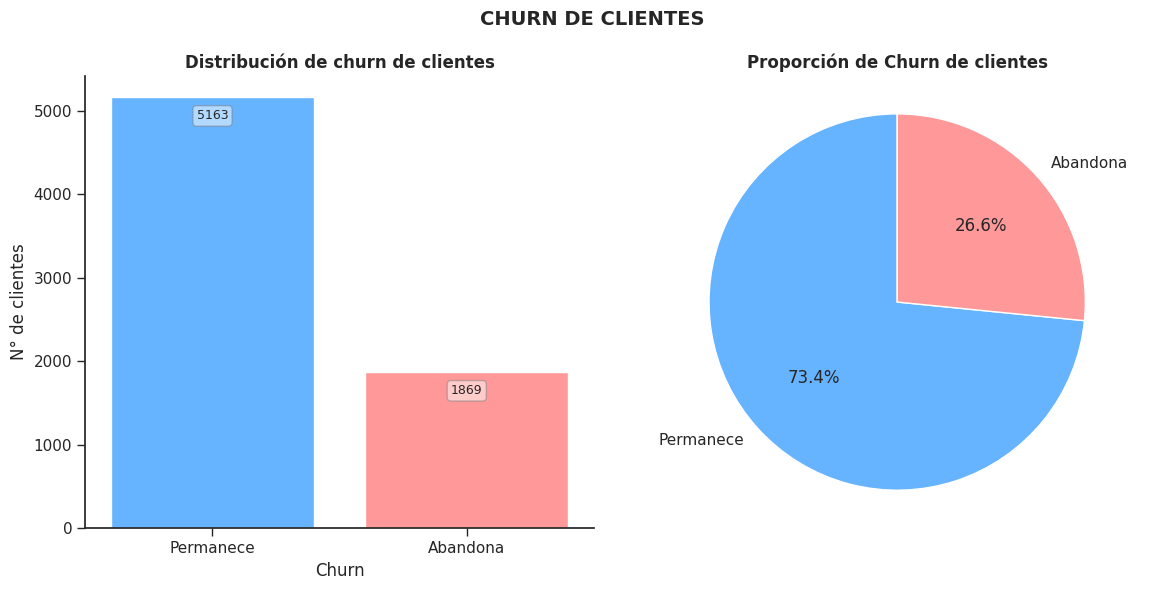

🔍 **Interpretación**:  
Aproximadamente **1 de cada 4 clientes abandona el servicio**, lo cual representa una tasa preocupante. Esta métrica es la variable objetivo que se buscará explicar y reducir.

### **3.2 📊 Churn por variables categóricas**

#### **🔹 Género:**

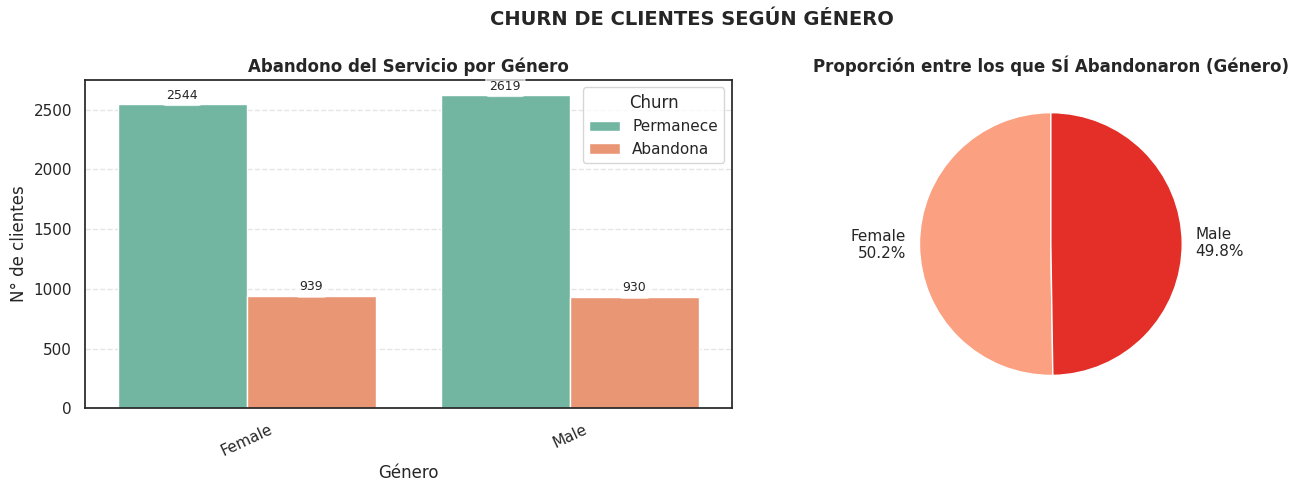

El comportamiento de abandono es **prácticamente igual** entre hombres y mujeres.  
📌 **Insight**: El género **no es un factor determinante** para el churn.

#### **🔹 Tipo de contrato:**

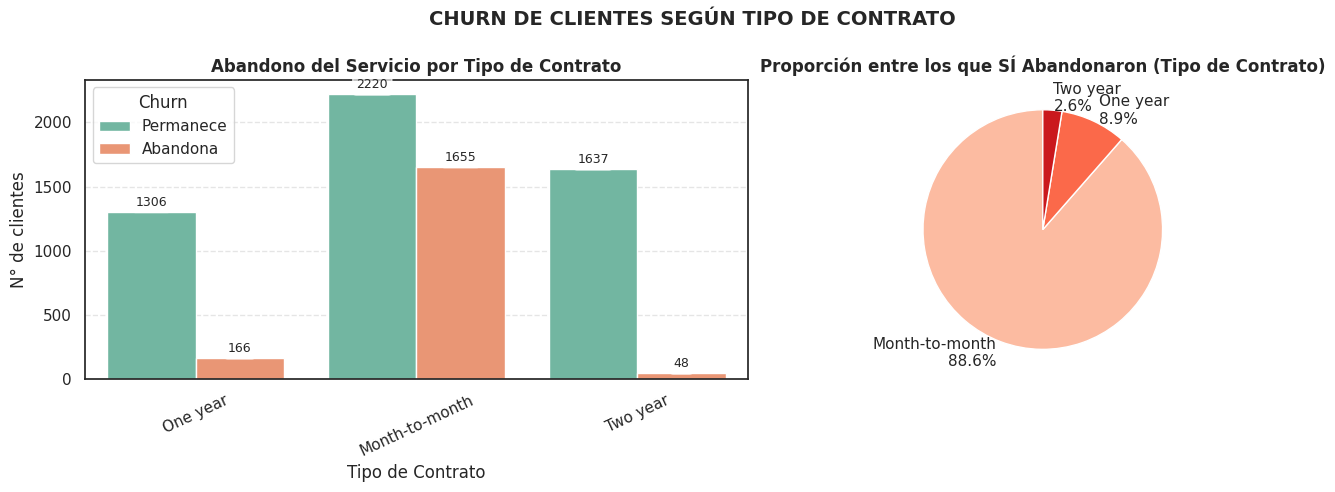

- Los clientes con contrato **mensual** presentan la mayor tasa de abandono.
- Los contratos anuales y bianuales **reducen significativamente la evasión**.

📌 **Insight**: Los contratos a largo plazo fomentan la fidelización del cliente.

#### **🔹 Método de pago:**

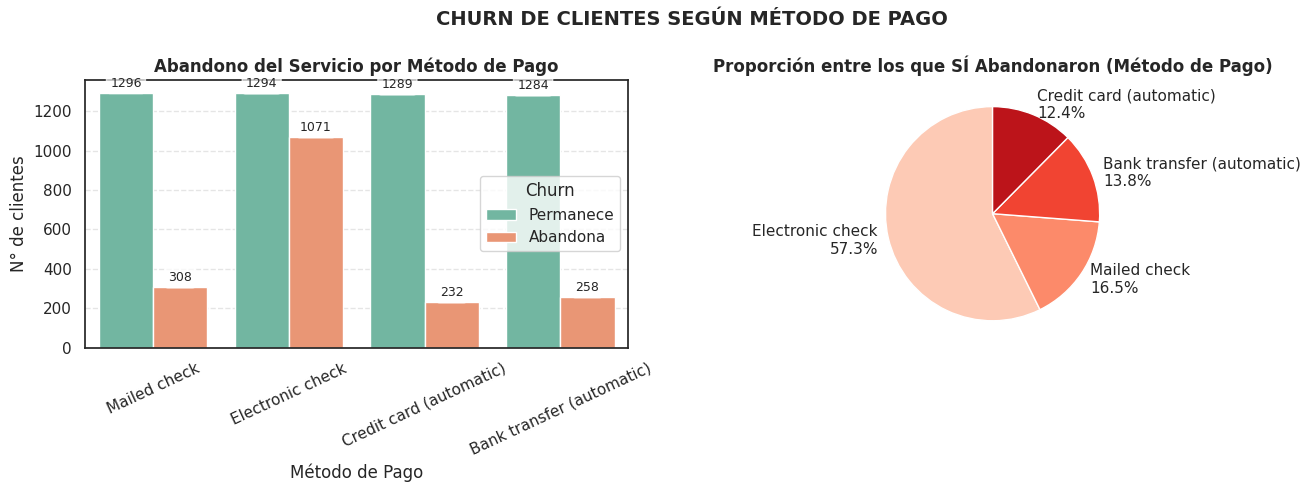

- Los clientes que utilizan **cheque electrónico** tienen las tasas más altas de abandono.
- Aquellos que utilizan **transferencias bancarias automáticas o tarjetas de crédito** abandonan con menor frecuencia.

📌 **Insight**: Los métodos automáticos pueden estar asociados a mayor comodidad y menor fricción, reduciendo el churn.

#### **🔹 Servicios contratados:**

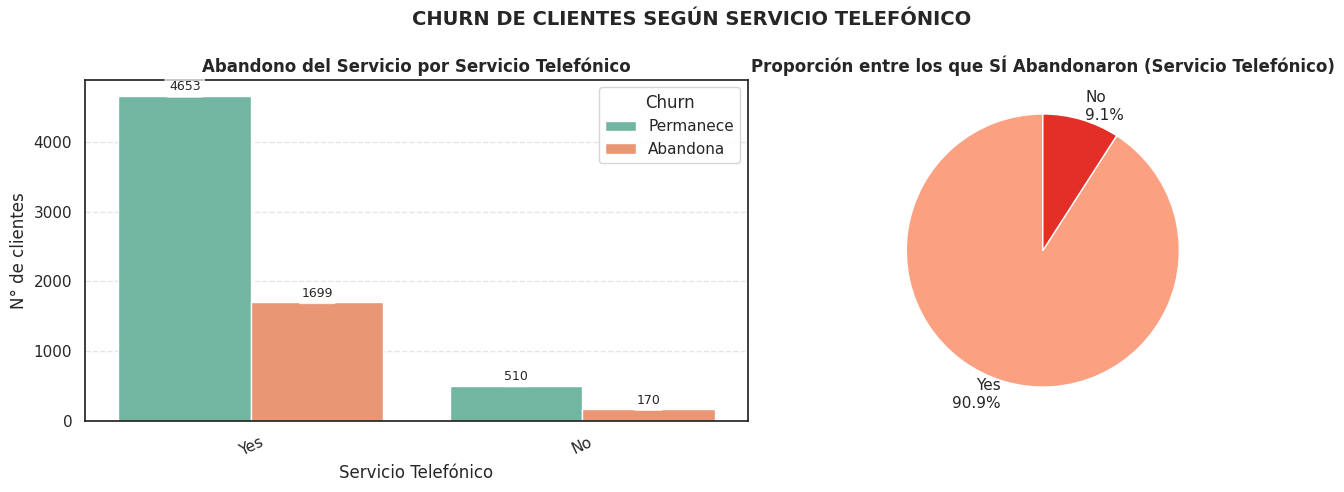

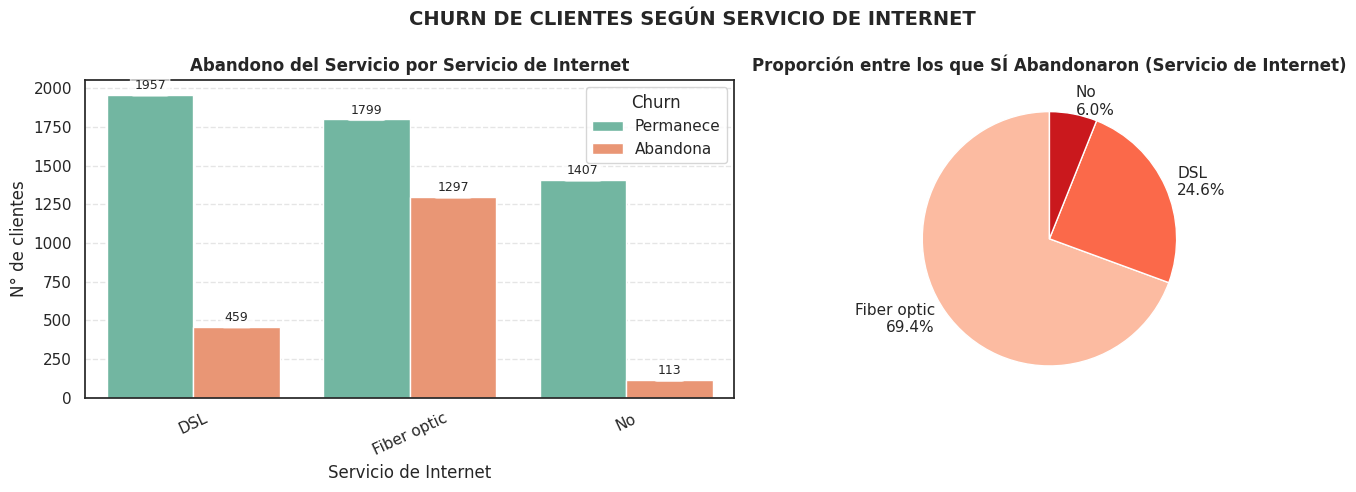

- El **servicio de telefonía** por sí solo tiene una **baja correlación** con la cancelación.
- El **servicio de internet** (especialmente fibra óptica) está asociado a **mayores niveles de evasión**.

📌 **Insight**: La complejidad y costo del servicio de internet podría estar elevando la tasa de abandono.

### **3.3 📈 Churn por variables numéricas**

#### **🔹 Meses de Contrato:**

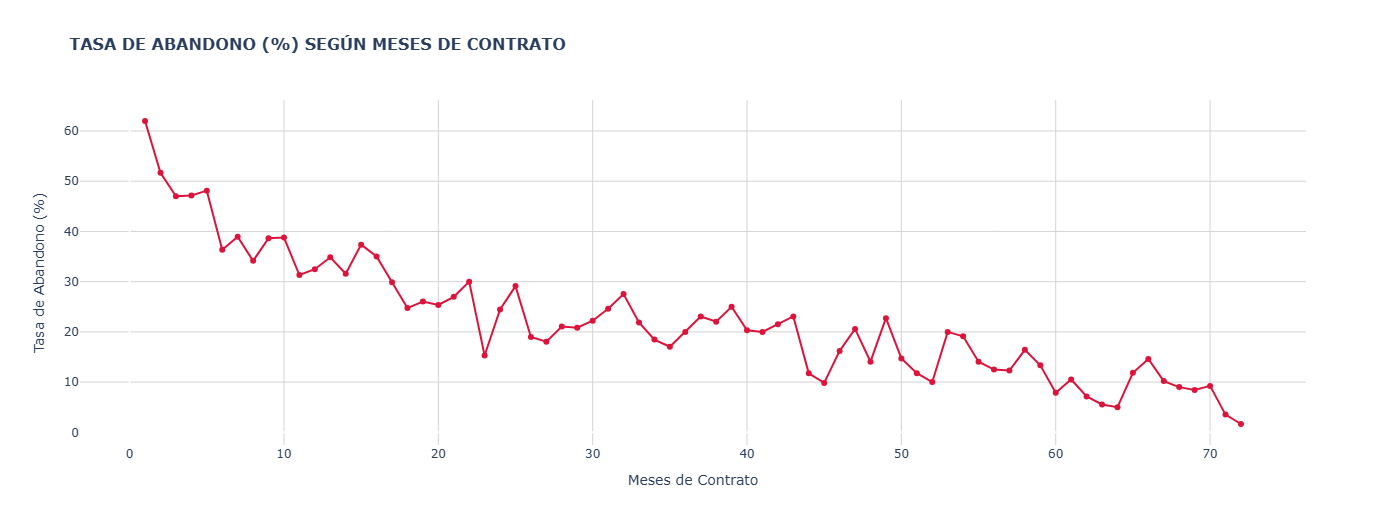

La tasa de abandono es **más alta durante los primeros meses** de permanencia y **disminuye progresivamente**.

📌 **Insight**: El abandono temprano es crítico. La experiencia de los primeros 6 meses puede definir la lealtad futura.

#### **🔹 Gasto Mensual y Total:**

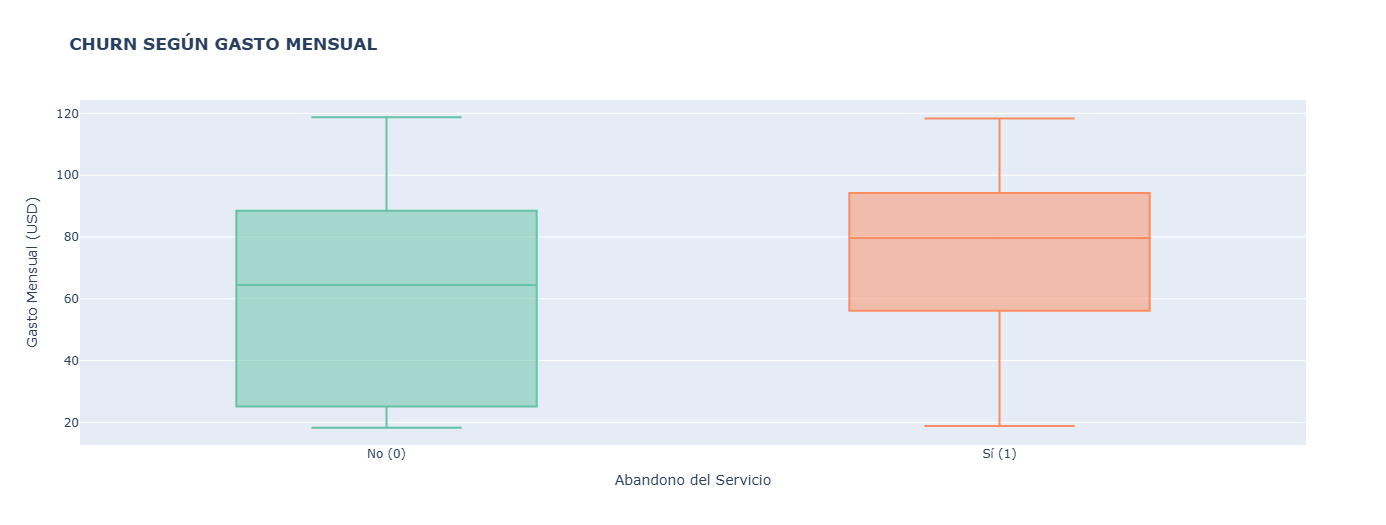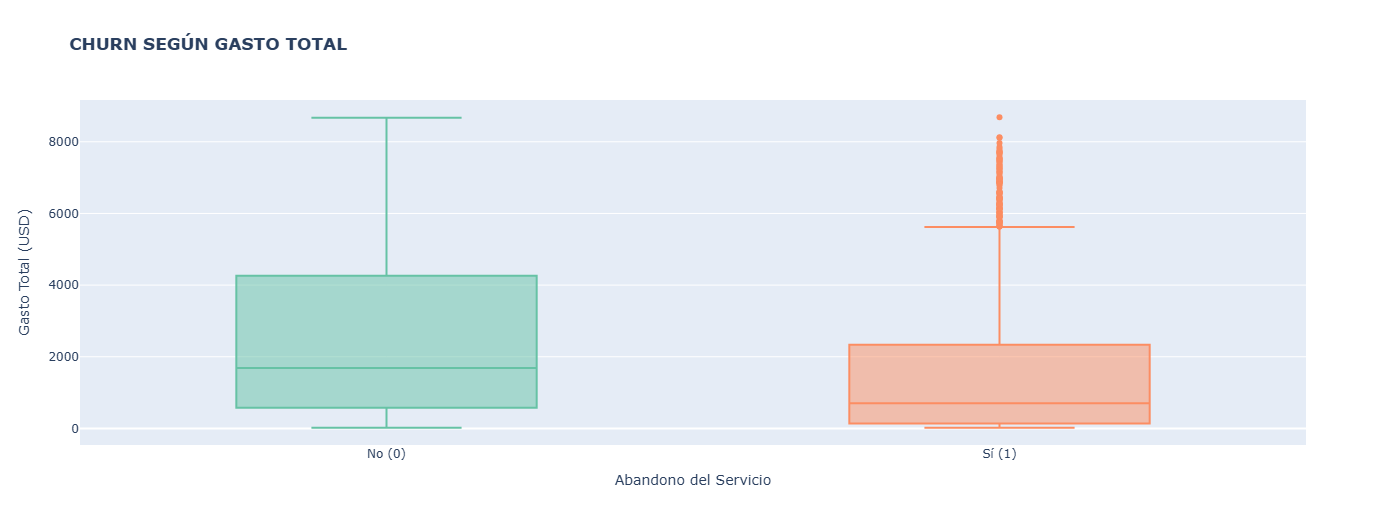

|    Métrica          |   Permanece   |   Abandona   |
|---------------------|---------------|--------------|
| Gasto Mensual       | 61.3          | 74.4         |
| Gasto Total         | 2555.3        | 1531.8       |

📌 **Insight**:  
- Los clientes que abandonan **pagan más por mes**, pero acumulan **menos gasto total** → indican contratos cortos y servicios caros.
- Esto sugiere que **el precio percibido como alto en etapas tempranas podría impulsar el abandono**.

### **3.4 🔄 Correlaciones entre variables y churn**

#### **🔹 Cuenta Diaria y Abandono:**

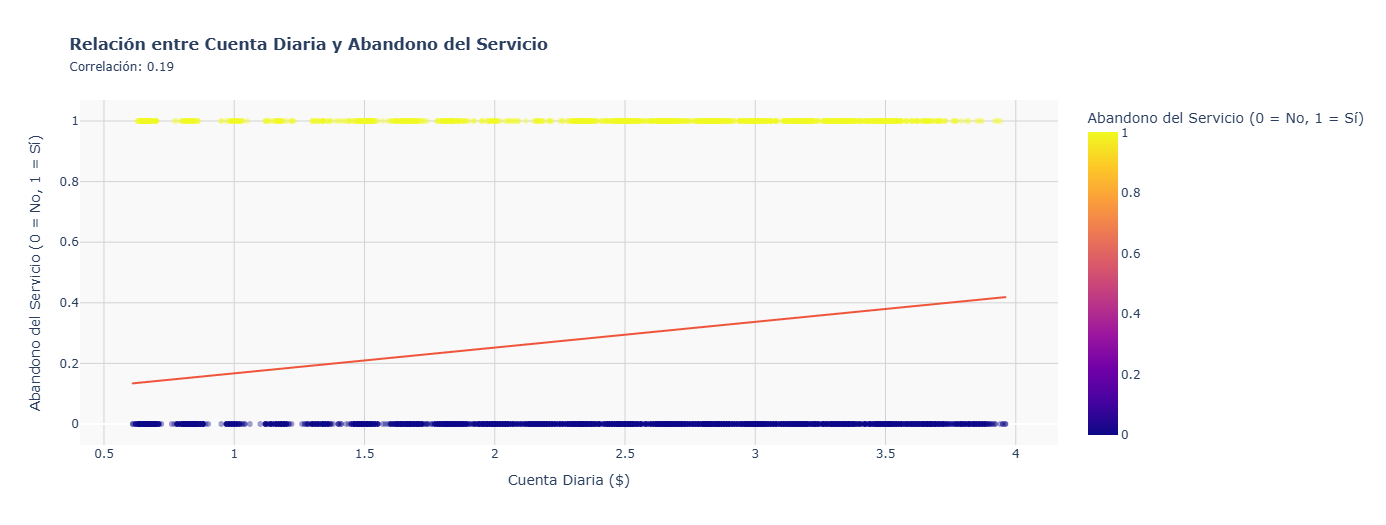

- Correlación = **+0.19**
- Clientes con **cuenta diaria más alta** (gasto diario) tienden a abandonar más.

📌 **Insight**: Puede existir una **sensación de sobreprecio**, especialmente en usuarios con servicios premium o adicionales.

#### **🔹 Servicio de telefonía y Abandono:**

- Correlación = **+0.01**

📌 **Insight**:

- El **servicio de telefonía** no influye significativamente en el abandono del servicio.


#### **🔹 Servicio de internet y Abandono:**

- Correlación = **+0.23**

📌 **Insight**:

- El **servicio de internet** es un factor clave en la evasión de clientes, su contratación se asocia con mayor riesgo de churn. Las estrategias de fidelización deben centrarse en mejorar la experiencia de los usuarios, especialmente los que tienen fibra óptica, que suele implicar mayores costos y expectativas.


#### **🔹 Servicios adicionales de internet y Abandono:**

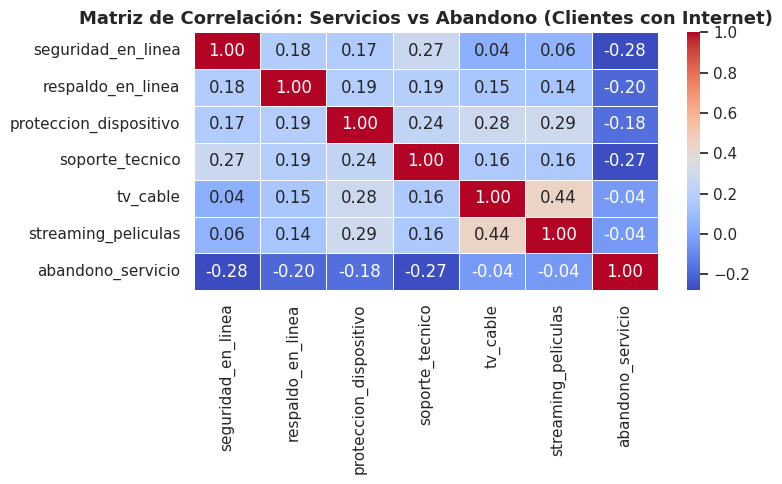

📌 **Insight**:

- **Servicios adicionales** como seguridad o soporte están **moderadamente relacionados con menor abandono**. Promover estos servicios puede actuar como **elemento de fidelización**.

## **4. Conclusiones**

- **El 27% de los clientes abandonan el servicio**, lo que implica una pérdida importante para la empresa.

- **El abandono es más frecuente en los primeros meses**, especialmente con contratos mensuales.

- **Clientes con mayores cargos mensuales abandonan más**, pese a tener menor gasto total → indica insatisfacción temprana o percepción de alto costo.

- **El método de pago es clave**: quienes usan cheque electrónico tienen mayor evasión. Los pagos automáticos muestran mejores tasas de retención.

- **El internet es el punto clave**: Tener servicio de internet (DSL o fibra óptica) está moderadamente correlacionado con el abandono. En contraste, tener telefonía no muestra relación significativa.

- **Servicios adicionales (seguridad, respaldo, soporte)** están correlacionados negativamente con el churn → son oportunidades de retención de clientes.

## **5. Recomendaciones**

- **Fortalecer el proceso de bienvenida y acompañamiento inicial**, especialmente durante los primeros 6 meses.

- **Incentivar contratos a largo plazo (1 o 2 años)** mediante descuentos, beneficios exclusivos o programas de puntos.

- **Promover el uso de métodos de pago automáticos**, ofreciendo beneficios por cambiar a ellos (como meses sin interés o descuentos).

- **Desarrollar paquetes que integren servicios adicionales**, como soporte técnico o seguridad, como herramientas de fidelización.

- **Realizar encuestas o análisis cualitativo a clientes con alto gasto mensual y corta permanencia** para comprender percepciones de valor y ajustar estrategias de pricing.

- **Enfocar campañas de retención en clientes con servicio de internet y gasto elevado**, segmentando por nivel de riesgo.